In [29]:
import yfinance as yf 
# Load data for SPY from Yahoo Finance
data = yf.download('SPY', start='2012-04-29', end='2022-04-29')

# Print the first 5 rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-04-30  140.110001  140.210007  139.490005  139.869995  113.711082   
2012-05-01  139.789993  141.660004  139.630005  140.740005  114.418434   
2012-05-02  139.919998  140.460007  139.460007  140.320007  114.076958   
2012-05-03  140.339996  140.449997  138.990005  139.250000  113.207077   
2012-05-04  138.520004  139.300003  136.919998  137.000000  111.377869   

               Volume  
Date                   
2012-04-30  115092200  
2012-05-01  138832200  
2012-05-02  121081000  
2012-05-03  143759700  
2012-05-04  193927300  


In [34]:
data

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-30,140.110001,140.210007,139.490005,139.869995,113.711082,115092200,6.390488e+06,115092200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.558709,NaN,0.000000
2012-05-01,139.789993,141.660004,139.630005,140.740005,114.418434,138832200,1.938481e+07,253924400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622014,0.620087,0.622014
2012-05-02,139.919998,140.460007,139.460007,140.320007,114.076958,121081000,1.065633e+08,132843400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.298421,-0.298867,0.321736
2012-05-03,140.339996,140.449997,138.990005,139.250000,113.207077,143759700,1.400488e+07,-10916300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.762548,-0.765470,-0.443265
2012-05-04,138.520004,139.300003,136.919998,137.000000,111.377869,193927300,-1.668850e+08,-204843600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.615799,-1.628995,-2.051902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,436.910004,438.079987,425.440002,426.040009,418.942078,132471800,2.121538e+10,5207172300,-0.072663,-3.110179e+08,...,-0.411925,0.058639,-0.470564,-2.320508,-6.938370,4.617862,443.387335,-2.743914,-2.782262,204.597143
2022-04-25,423.670013,428.690002,418.839996,428.510010,421.370941,119647700,2.133066e+10,5326820000,-0.043235,-2.243682e+08,...,-0.598903,-0.072869,-0.526033,0.571094,-5.436477,6.007571,442.039791,0.579758,0.578084,206.363069
2022-04-26,425.829987,426.040009,416.070007,416.100006,409.167694,103996300,2.122729e+10,5222823700,-0.139394,-3.766863e+08,...,-0.966243,-0.251544,-0.714699,1.430298,-4.063122,5.493420,439.152634,-2.896083,-2.938847,197.490542


In [37]:
import ta
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
close_data = data['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
close_data = scaler.fit_transform(close_data)

# Generate technical indicators using ta package
data_ta = ta.add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume')

# Drop rows with NaN values
data_ta = data.fillna(0)

# Define input and output data
features = data_ta.drop(['Close'], axis=1).values
labels = data_ta['Close'].values.reshape(-1, 1)

# Define lookback window size
lookback = 60

# Split data into train, validation, and test sets
train_size = int(len(features) * 0.6)
valid_size = int(len(features) * 0.2)
test_size = len(features) - train_size - valid_size

train_features = features[:train_size]
valid_features = features[train_size:train_size+valid_size]
test_features = features[-test_size:]

train_labels = labels[:train_size]
valid_labels = labels[train_size:train_size+valid_size]
test_labels = labels[-test_size:]

# Reshape data for LSTM model
def reshape_for_lstm(features, labels, lookback):
    X, y = [], []
    for i in range(lookback, len(features)):
        X.append(features[i-lookback:i, :])
        y.append(labels[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = reshape_for_lstm(train_features, train_labels, lookback)
X_valid, y_valid = reshape_for_lstm(valid_features, valid_labels, lookback)
X_test, y_test = reshape_for_lstm(test_features, test_labels, lookback)


c:\Users\johnn\anaconda3\envs\tf_2.3_py_3.7\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\johnn\anaconda3\envs\tf_2.3_py_3.7\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [39]:
X_train.shape

(1450, 60, 91)

In [38]:
data_ta

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-30,140.110001,140.210007,139.490005,139.869995,113.711082,115092200,6.390488e+06,115092200,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.558709,0.000000,0.000000
2012-05-01,139.789993,141.660004,139.630005,140.740005,114.418434,138832200,1.938481e+07,253924400,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.622014,0.620087,0.622014
2012-05-02,139.919998,140.460007,139.460007,140.320007,114.076958,121081000,1.065633e+08,132843400,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.298421,-0.298867,0.321736
2012-05-03,140.339996,140.449997,138.990005,139.250000,113.207077,143759700,1.400488e+07,-10916300,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.762548,-0.765470,-0.443265
2012-05-04,138.520004,139.300003,136.919998,137.000000,111.377869,193927300,-1.668850e+08,-204843600,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.615799,-1.628995,-2.051902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,436.910004,438.079987,425.440002,426.040009,418.942078,132471800,2.121538e+10,5207172300,-0.072663,-3.110179e+08,...,-0.411925,0.058639,-0.470564,-2.320508,-6.938370,4.617862,443.387335,-2.743914,-2.782262,204.597143
2022-04-25,423.670013,428.690002,418.839996,428.510010,421.370941,119647700,2.133066e+10,5326820000,-0.043235,-2.243682e+08,...,-0.598903,-0.072869,-0.526033,0.571094,-5.436477,6.007571,442.039791,0.579758,0.578084,206.363069
2022-04-26,425.829987,426.040009,416.070007,416.100006,409.167694,103996300,2.122729e+10,5222823700,-0.139394,-3.766863e+08,...,-0.966243,-0.251544,-0.714699,1.430298,-4.063122,5.493420,439.152634,-2.896083,-2.938847,197.490542


In [45]:
spy_data = data

# Create training and validation data
lookback = 60
train_size = int(len(spy_data) * 0.8)
train_data = spy_data[:train_size]
valid_data = spy_data[train_size:]
X_train, y_train = [], []
for i in range(lookback, len(train_data)):
    X_train.append(train_data[i-lookback:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid, y_valid = [], []
for i in range(lookback, len(valid_data)):
    X_valid.append(valid_data[i-lookback:i, 0])
    y_valid.append(valid_data[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))


InvalidIndexError: (slice(0, 60, None), 0)

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



input_dim = 1
output_dim = 1
hidden_dim = 64
num_layers = 10
num_heads = 50
dropout_rate = 0.2
learning_rate = 0.001
batch_size = 32
num_epochs = 50


inputs = tf.keras.Input(shape=(lookback, input_dim))
x = inputs
for i in range(num_layers):
    x = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_dim)(x, x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Dense(hidden_dim, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.LSTM(hidden_dim, return_sequences=True)(x)
    x = tf.keras.layers.Lambda(lambda x: x[:, -1, :])(x)
    x = tf.keras.layers.RepeatVector(1)(x)  # add RepeatVector layer here
x = tf.keras.layers.Flatten()(x)  # add Flatten layer here
outputs = tf.keras.layers.Dense(output_dim)(x)

brt_model = tf.keras.Model(inputs=inputs, outputs=outputs)
brt_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse'])


history_brt = brt_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_valid, y_valid))


# Define LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(hidden_dim, input_shape=(lookback, input_dim)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(output_dim)
])
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse'])

# Train LSTM model
history_lstm = lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, verbose=0)

# Plot loss and accuracy for both models
plt.plot(history_brt.history['loss'], label='BRT Training Loss')
plt.plot(history_brt.history['val_loss'], label='BRT Validation Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'pop from an empty set'

14/14 [==============================] - 0s 4ms/step


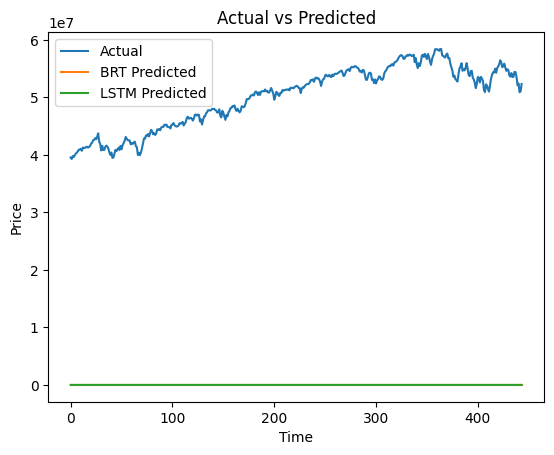

In [44]:
# Get predictions for test data
y_pred_brt = brt_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform to get actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_brt = scaler.inverse_transform(y_pred_brt.reshape(-1, 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1))

# Plot actual vs predicted for both models
plt.plot(y_test, label='Actual')
plt.plot(y_pred_brt, label='BRT Predicted')
plt.plot(y_pred_lstm, label='LSTM Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
X_train.shape

(1450, 60, 1)

In [15]:
y_train.shape

(1450,)

In [16]:
spy_data

array([[0.03366606],
       [0.03615457],
       [0.03495324],
       ...,
       [0.8237751 ],
       [0.82712164],
       [0.85726954]])

In [17]:
# Load SPY data
spy_data = data
spy_data = spy_data.dropna()
spy_data = spy_data[['Close']]
spy_data = spy_data.values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
spy_data = scaler.fit_transform(spy_data)

# Create training and test data
lookback = 60
train_size = int(len(spy_data) * 0.8)
train_data = spy_data[:train_size]
test_data = spy_data[train_size:]

# Create input and target data for training set
X_train, y_train = [], []
for i in range(lookback, len(train_data)):
    X_train.append(train_data[i-lookback:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create input and target data for test set
X_test, y_test = [], []
for i in range(lookback, len(test_data)):
    X_test.append(test_data[i-lookback:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Print shapes of input and target data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1953, 60)
y_train shape: (1953,)
X_test shape: (444, 60)
y_test shape: (444,)


In [20]:

y_valid.shape

(443,)

In [19]:
X_valid.shape

(443, 60, 1)

In [26]:
train_data = spy_data[:train_size]
train_data

array([[0.03366606],
       [0.03615457],
       [0.03495324],
       ...,
       [0.39532621],
       [0.3960413 ],
       [0.39017765]])

In [27]:
spy_data

array([[0.03366606],
       [0.03615457],
       [0.03495324],
       ...,
       [0.8237751 ],
       [0.82712164],
       [0.85726954]])

In [28]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-30,140.110001,140.210007,139.490005,139.869995,113.711113,115092200
2012-05-01,139.789993,141.660004,139.630005,140.740005,114.418442,138832200
2012-05-02,139.919998,140.460007,139.460007,140.320007,114.076950,121081000
2012-05-03,140.339996,140.449997,138.990005,139.250000,113.207077,143759700
2012-05-04,138.520004,139.300003,136.919998,137.000000,111.377869,193927300
...,...,...,...,...,...,...
2022-04-22,436.910004,438.079987,425.440002,426.040009,418.942047,132471800
2022-04-25,423.670013,428.690002,418.839996,428.510010,421.370941,119647700
2022-04-26,425.829987,426.040009,416.070007,416.100006,409.167694,103996300
